In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [187]:
df = pd.read_csv('/root/Desktop/Black_Friday.csv')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [189]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [190]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [191]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [192]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [193]:
df.shape

(550068, 12)

In [194]:
corr = df.corr()

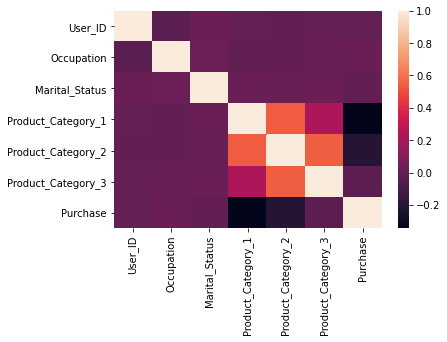

In [195]:
sns.heatmap(corr)

In [196]:
df.drop(columns=['Product_Category_2','Product_Category_3'], axis=1,inplace=True)

In [197]:
df.shape

(550068, 10)

In [198]:
le = preprocessing.LabelEncoder()

In [199]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00164242       1
P00162742       1
P00013442       1
P00091742       1
P00206542       1
Name: Product_ID, Length: 3631, dtype: int64

In [200]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [201]:
df.Gender = le.fit_transform(df.Gender)

In [202]:
df.Age = le.fit_transform(df.Age)

In [203]:
df.Occupation = le.fit_transform(df.Occupation)

In [204]:
df.City_Category = le.fit_transform(df.City_Category)

In [205]:
df.Stay_In_Current_City_Years = le.fit_transform(df.Stay_In_Current_City_Years)

In [206]:
df.Marital_Status = le.fit_transform(df.Marital_Status)

In [207]:
df.Product_Category_1 = le.fit_transform(df.Product_Category_1)

In [208]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,0,0,10,0,2,0,2,8370
1,1000001,P00248942,0,0,10,0,2,0,0,15200
2,1000001,P00087842,0,0,10,0,2,0,11,1422
3,1000001,P00085442,0,0,10,0,2,0,11,1057
4,1000002,P00285442,1,6,16,2,4,0,7,7969


In [209]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
550063,1006033,P00372445,1,5,13,1,1,1,19,368
550064,1006035,P00375436,0,2,1,2,3,0,19,371
550065,1006036,P00375436,0,2,15,1,4,1,19,137
550066,1006038,P00375436,0,6,1,2,2,0,19,365
550067,1006039,P00371644,0,4,0,1,4,1,19,490


In [210]:
lr = LinearRegression()

In [211]:
df_1 = pd.read_csv('/root/Desktop/Black_Friday.csv')

In [212]:
X = df_1.drop(['User_ID','Product_ID','Purchase'],axis=1)

In [213]:
df_1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [214]:
df_1.drop(columns=['Product_Category_2','Product_Category_3'], axis=1,inplace=True)

In [215]:
df_1.Gender=le.fit_transform(df_1.Gender)

In [216]:
df_1.Age=le.fit_transform(df_1.Age)

In [217]:
df_1.Occupation=le.fit_transform(df_1.Occupation)

In [218]:
df_1.City_Category=le.fit_transform(df_1.City_Category)

In [219]:
df_1.Stay_In_Current_City_Years=le.fit_transform(df_1.Stay_In_Current_City_Years)

In [220]:
df_1.Marital_Status=le.fit_transform(df_1.Marital_Status)

In [221]:
df_1.Product_Category_1=le.fit_transform(df_1.Product_Category_1)

In [222]:
df_1.drop(columns=['Purchase'], axis=1,inplace=True)

In [223]:
df_1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,1000001,P00069042,0,0,10,0,2,0,2
1,1000001,P00248942,0,0,10,0,2,0,0
2,1000001,P00087842,0,0,10,0,2,0,11
3,1000001,P00085442,0,0,10,0,2,0,11
4,1000002,P00285442,1,6,16,2,4,0,7


In [224]:
y = df.Purchase
X_test=df_1.drop(['User_ID','Product_ID'],axis=1)

In [225]:
lr.fit(X,y)

ValueError: could not convert string to float: 'F'